In [2]:
using Revise
using Random
using TensorCrossInterpolation
import TensorCrossInterpolation as TCI
using CSV
using DataFrames
using Statistics
using LinearAlgebra
using LaTeXStrings
using Plots
using JLD2
using Tensor_FixedSeedMC
import Tensor_FixedSeedMC as TCIMC
using NPZ

In [2]:
#JLD2.@load "option_tt.jld2" option_tt
#JLD2.@load "tt.jld2" tt_tci
JLD2.@load "tt_3.jld2" tt_tci
option_tt_ = tt_tci.sitetensors

10-element Vector{Array{Float64, 3}}:
 [1.0 0.9560446542690059 … -0.005779692457738483 0.0;;; 0.0 -0.014118028636486635 … 0.9815346252944539 1.0;;; 0.0 0.058029576262422174 … 0.024288934582296792 0.0]
 [0.0 -0.005582916478380784 … 0.9472557180900162 1.0; -0.0546409505391396 -0.049911047107019865 … 0.23318684654553284 0.2603220677691344; -0.16891727538899598 -0.16254117652994685 … 0.7022287347890681 0.7467129605419313;;; 0.0 0.007918316183093244 … -0.0032905559481169137 0.0; 1.1850676729807808 1.1579909165286728 … 0.08173046829564504 0.09112705724719297; 0.8404797690681469 0.8394210465840876 … 0.07173582394562943 0.0831058568271404;;; 0.0 0.006326466864770906 … -0.004978334358970359 0.0; 0.109206941675229 0.09091533447081779 … 1.1238434976078622 1.135316888005335; 0.2703853221740869 0.2616413538244219 … 0.6489225881070908 0.6604114313056781;;; 0.0 -0.027501528059164004 … -0.030361396881538674 0.0; 0.05589591574548192 0.03428299723545557 … 0.28128835771244853 0.3113096256258422; 0.004994

In [3]:
@show size(option_tt_[1])
@show size(option_tt_[2])
@show size(option_tt_[3])
@show size(option_tt_[4])
@show size(option_tt_[5])
@show size(option_tt_[6])
@show size(option_tt_[7])
@show size(option_tt_[8])
@show size(option_tt_[9])
@show size(option_tt_[10])

size(option_tt_[1]) = (1, 100, 3)
size(option_tt_[2]) = (3, 100, 8)
size(option_tt_[3]) = (8, 100, 10)
size(option_tt_[4]) = (10, 100, 10)
size(option_tt_[5]) = (10, 100, 10)
size(option_tt_[6]) = (10, 100, 10)
size(option_tt_[7]) = (10, 100, 10)
size(option_tt_[8]) = (10, 100, 7)
size(option_tt_[9]) = (7, 100, 5)
size(option_tt_[10]) = (5, 100, 1)


(5, 100, 1)

In [4]:
tol = 1e-3
TCIMC.compress!(option_tt_; tolerance=tol)
@show size(option_tt_[1])
@show size(option_tt_[2])
@show size(option_tt_[3])
@show size(option_tt_[4])
@show size(option_tt_[5])
@show size(option_tt_[6])
@show size(option_tt_[7])
@show size(option_tt_[8])
@show size(option_tt_[9])
@show size(option_tt_[10])

size(option_tt_[1]) = (1, 100, 2)
size(option_tt_[2]) = (2, 100, 4)
size(option_tt_[3]) = (4, 100, 6)
size(option_tt_[4]) = (6, 100, 6)
size(option_tt_[5]) = (6, 100, 8)
size(option_tt_[6]) = (8, 100, 7)
size(option_tt_[7]) = (7, 100, 7)
size(option_tt_[8]) = (7, 100, 4)
size(option_tt_[9]) = (4, 100, 4)
size(option_tt_[10]) = (4, 100, 1)


(4, 100, 1)

In [5]:
function makeMP0fromMPS_3(tt::Vector{Array{Float64,3}})
    d = length(tt)
    tts = Vector{Array{Float64,4}}()
    for i in 1:2:d
        #@show i
        size_core1 = size(tt[i])
        size_core2 = size(tt[i+1])
        mat_core1 = reshape(permutedims(tt[i], (1, 2, 3)), (size_core1[1] * size_core1[2], size_core1[3]))
        mat_core2 = reshape(permutedims(tt[i+1], (1, 2, 3)), (size_core2[1], size_core2[2] * size_core2[3]))
        new_core = mat_core1 * mat_core2
        new_core = reshape(new_core, (size_core1[1], size_core1[2],  size_core2[2], size_core2[3]))
        push!(tts, new_core)
    end
    return tts
end



makeMP0fromMPS_3 (generic function with 1 method)

In [6]:
option_tt = makeMP0fromMPS_3(option_tt_)

5-element Vector{Array{Float64, 4}}:
 [9.40098166070729e7 9.49010737932766e7 … 1.4762253220369884e8 1.47920548381065e8;;; 9.666636226288359e7 9.754277132233036e7 … 1.4933025034689173e8 1.4962232798761487e8;;; 9.933044253068179e7 1.001915939557398e8 … 1.510202009842956e8 1.5130619146130767e8;;; … ;;; 2.3348890803893363e8 2.3348564518510973e8 … 2.3021086653862813e8 2.301558591811758e8;;; 2.3363773127942336e8 2.3363544833491564e8 … 2.304180361132188e8 2.3036334593265936e8;;; 2.3377738946995187e8 2.337761216276387e8 … 2.306183273445201e8 2.3056396907772765e8;;;; -1.713876695116344e7 -1.70976582976316e7 … -1.4382890277188417e7 -1.4364192874408768e7;;; -1.7215497681716047e7 -1.716993343772829e7 … -1.4184394030245397e7 -1.4164080721652849e7;;; -1.7274436288992967e7 -1.7224573049531195e7 … -1.3977977660328351e7 -1.3956108718744818e7;;; … ;;; 1.2587471539969731e7 1.256320275405476e7 … 1.0927974029586764e7 1.0916366482004449e7;;; 1.2719589433912447e7 1.269543945947462e7 … 1.1065662852114383e7 1.

In [7]:
@show size(option_tt[1])
@show size(option_tt[2])
@show size(option_tt[3])
@show size(option_tt[4])
@show size(option_tt[5])

size(option_tt[1]) = (1, 100, 100, 4)
size(option_tt[2]) = (4, 100, 100, 6)
size(option_tt[3]) = (6, 100, 100, 7)
size(option_tt[4]) = (7, 100, 100, 4)
size(option_tt[5]) = (4, 100, 100, 1)


(4, 100, 100, 1)

In [8]:
d = 5
T = 1.0
r = 0.01
K = 100.0
t = 0.0
#Ss = collect(0.15:0.001:0.249)
Ss = collect(90.0:0.3:119.7)
len_Ss = length(Ss)
σs = collect(0.15:0.001:0.249)
len_σs = length(σs)

100

In [9]:
len = 10000
num_samples = 100
random_combinations = TCIMC.generate_random_combinations(len, d, num_samples)

100-element Vector{Vector{Int64}}:
 [1237, 1773, 5845, 9103, 418]
 [2883, 8651, 8446, 5089, 216]
 [7212, 5057, 3138, 3427, 2326]
 [5861, 8794, 1771, 6809, 3738]
 [7108, 2844, 6474, 1804, 5796]
 [7377, 1916, 8567, 6119, 4446]
 [6430, 4146, 5653, 1271, 2272]
 [2540, 3055, 3860, 2464, 9650]
 [6027, 9073, 2716, 2286, 8192]
 [3543, 1704, 5263, 1788, 3818]
 ⋮
 [1825, 6897, 6102, 8545, 923]
 [5541, 9371, 9954, 9010, 845]
 [6895, 1204, 9046, 8607, 5022]
 [8769, 735, 8811, 6867, 7405]
 [7688, 7054, 1281, 6898, 7777]
 [1365, 658, 8523, 1793, 1217]
 [2698, 4661, 2173, 1766, 5657]
 [4335, 2650, 2757, 1353, 3183]
 [5140, 3258, 2828, 2455, 7885]

In [10]:
mc_data = JLD2.load("vol&stock0_mc_d5_50000000_rand.jld2")
monte = mc_data["mc"]

100-element Vector{Float64}:
 0.809726267002814
 1.44162025311467
 1.3788217105417095
 2.2290540654619737
 1.3848081790571067
 1.7521460704494607
 1.3383153089902353
 1.4059817382172173
 1.7200976569443016
 0.9859040202267134
 ⋮
 1.4970328798836208
 2.5515436280427854
 1.5611846958199684
 2.017965844930143
 2.3806258415087513
 0.6889037817120944
 1.2628506353965767
 0.9885275482997512
 1.3533901187218211

In [11]:
function evaluate_options2(random_combinations, tt_option)
    result_hako = []
    result_time = []
    for i in random_combinations
        indices = TCIMC.indices_1d_to_2d(i, 100)
        indices_pairs = [(indices[i], indices[i+1]) for i in 1:2:length(indices)-1]
        #@show i
        time_inner = @elapsed begin
            result = _evaluate3(tt_option, indices_pairs)
            #result = ((η^d) * exp(-r * (T - t)) * inner_) / ((2 * π)^d)
            #result = real(result)
        end
        push!(result_hako, result)
        push!(result_time, time_inner)
    end
    return result_hako, result_time
end

evaluate_options2 (generic function with 1 method)

In [12]:
# 関数の定義
function _evaluate3(tt::Vector{Array{V,4}}, indexset) where {V}
    only(prod(T[:, i, j, :] for (T, (i, j)) in zip(tt, indexset)))
end

_evaluate3 (generic function with 1 method)

In [13]:
@show size(option_tt[1])
@show size(option_tt[2])
@show size(option_tt[3])
@show size(option_tt[4])
@show size(option_tt[5])

size(option_tt[1]) = (1, 100, 100, 4)
size(option_tt[2]) = (4, 100, 100, 6)
size(option_tt[3]) = (6, 100, 100, 7)
size(option_tt[4]) = (7, 100, 100, 4)
size(option_tt[5]) = (4, 100, 100, 1)


(4, 100, 100, 1)

In [14]:
res, time = evaluate_options2(random_combinations, option_tt)

(Any[0.8175032412608526, 1.4461001785597987, 1.3750288199199832, 2.210624987668625, 1.3749323229679014, 1.7770377199921994, 1.3438923404461487, 1.3932644776698562, 1.7373828151250834, 0.9691740210643806  …  1.794435710422012, 1.486516793626312, 2.5631256306716907, 1.570681823394663, 2.0322373943272987, 2.369228650901086, 0.6874431962209077, 1.2669990887849687, 0.972766102408298, 1.3463584222852296], Any[0.0526985, 3.833e-6, 1.958e-6, 2.375e-6, 4.542e-6, 5.208e-6, 2.5e-6, 2.375e-6, 5.416e-6, 1.667e-6  …  1.125e-6, 1.667e-6, 1.208e-6, 1.375e-6, 1.708e-6, 2.166e-6, 1.208e-6, 1.625e-6, 1.625e-6, 9.58e-7])

In [15]:
@show mean(time)

mean(time) = 0.0005290145499999997


0.0005290145499999997

In [16]:
abs_err = abs.(monte .- real(res)) 

100-element Vector{Float64}:
 0.0077769742580385826
 0.004479925445128652
 0.003792890621726386
 0.018429077793348903
 0.009875856089205381
 0.024891649542738703
 0.005577031455913373
 0.012717260547361109
 0.0172851581807818
 0.016729999162332865
 ⋮
 0.010516086257308821
 0.011582002628905297
 0.009497127574694453
 0.014271549397155692
 0.011397190607665308
 0.0014605854911867722
 0.004148453388391982
 0.01576144589145323
 0.007031696436591517

In [17]:
abs_err = abs.(monte .- real(res)) 
println("Maximum abs. error: ", maximum(abs_err))
val, index_ = findmax(abs_err)
@show random_combinations[index_]
@show monte[index_]
@show res[index_]
@show (TCIMC.bonddims(option_tt))
@show maximum(TCIMC.bonddims(option_tt))
@show sum([prod(size(tt)) for tt in option_tt]) #要素数
@show sum([prod(size(tt)) for tt in option_tt])/10000^5 #要素数
@show mean(time)
@show TCIMC.compComplexity(d, option_tt)

Maximum abs. error: 0.035785735345978065
random_combinations[index_] = [8463, 341, 9087, 5623, 3092]
monte[index_] = 1.2666057785530564
res[index_] = 1.3023915138990345
qo.bonddims(option_tt) = [1, 4, 6, 7, 4, 1]
maximum(qo.bonddims(option_tt)) = 7
sum([prod(size(tt)) for tt = option_tt]) = 1020000
sum([prod(size(tt)) for tt = option_tt]) / 10000 ^ 5 = 1.3133701700221512e-13
mean(time) = 0.0005290145499999997
bond dimension for V: [1, 4, 6, 7, 4, 1]
qo.compComplexity(d, option_tt) = 102


102

In [18]:
@show mean(abs.(monte .- real(res)) )

mean(abs.(monte .- real(res))) = 0.011045575209559788


0.011045575209559788

### vegaの誤差評価

In [20]:
diff_mat = TCIMC.diff_matrix(100, 0.001);
option_tt_grad_sigma = TCIMC.grad_tt_sigma(option_tt, 1, diff_mat);
res_grad_sigma, time = evaluate_options2(random_combinations, option_tt_grad_sigma);
res_grad_sigma

JLD2.@load "vol&stock0_malliavine_vega_d5_true_rand.jld2" mc
vega_malliavine_true = mc

@show mean(abs.(vega_malliavine_true .- res_grad_sigma)) 

JLD2.@load "vol&stock0_mc_d5_vega_1000000_rand.jld2" vega
res_vega_MC6 = real(vega[1])
err_vega_MC6 = real(vega[2])
@show mean(err_vega_MC6)
@show mean(abs.(res_vega_MC6 .- vega_malliavine_true)) 
@show mean(abs.(res_vega_MC6 .- vega_malliavine_true)./abs.(vega_malliavine_true)) 
@show mean((abs.(res_grad_sigma .- vega_malliavine_true))./(abs.(vega_malliavine_true)))

@show mean(abs.(res_vega_MC6 .- res_grad_sigma))
@show mean(abs.(res_vega_MC6 .- vega_malliavine_true)) 
@show mean(err_vega_MC6 ./ abs.(vega_malliavine_true))

mean(abs.(vega_malliavine_true .- res_grad_sigma)) = 0.11836488005027672
mean(err_vega_MC6) = 0.016003613162588144
mean(abs.(res_vega_MC6 .- vega_malliavine_true)) = 0.012040970584658384
mean(abs.(res_vega_MC6 .- vega_malliavine_true) ./ abs.(vega_malliavine_true)) = 0.21663170959355602
mean(abs.(res_grad_sigma .- vega_malliavine_true) ./ abs.(vega_malliavine_true)) = 2.8127399958596495
mean(abs.(res_vega_MC6 .- res_grad_sigma)) = 0.11591626240389974
mean(abs.(res_vega_MC6 .- vega_malliavine_true)) = 0.012040970584658384
mean(err_vega_MC6 ./ abs.(vega_malliavine_true)) = 0.16351431682700246


0.16351431682700246

In [21]:
JLD2.@load "vol&stock0_mc_d5_delta_1000000_rand.jld2" delta
res_delta_MC6 = real(delta[1])
err_delta_MC6 = real(delta[2])

diff_mat_S0 = TCIMC.diff_matrix(100, 0.3)
option_tt_grad_stock = TCIMC.grad_tt_stock0(option_tt, 1, diff_mat_S0) # 
res_S0_grad, time_S0_grad = evaluate_options2(random_combinations, option_tt_grad_stock);
JLD2.@load "vol&stock0_malliavine_delta_d5_true_rand.jld2" mc
delta_malliavine_true = mc

@show mean(abs.(delta_malliavine_true .- res_S0_grad))
@show mean(err_delta_MC6)
@show mean(abs.(res_S0_grad .- res_delta_MC6))
@show mean(abs.(delta_malliavine_true .- res_S0_grad) ./ abs.(delta_malliavine_true))
@show mean(err_delta_MC6 ./ abs.(delta_malliavine_true))


mean(abs.(delta_malliavine_true .- res_S0_grad)) = 0.0009001202871769238
mean(err_delta_MC6) = 0.0002665582950904578
mean(abs.(res_S0_grad .- res_delta_MC6)) = 0.000891942070213526
mean(abs.(delta_malliavine_true .- res_S0_grad) ./ abs.(delta_malliavine_true)) = 0.36632842709579494
mean(err_delta_MC6 ./ abs.(delta_malliavine_true)) = 0.025181527755119785


0.025181527755119785

In [22]:
JLD2.@load "vol&stock0_mc_d5_gamma_1000000_rand.jld2" gamma
res_gamma_MC6 = real(gamma[1])
err_gamma_MC6 = real(gamma[2])

diff_mat_S0_second = TCIMC.second_diff_matrix(100, 0.3) 
#diff_mat_S0_second = TCIMC.second_diff_matrix(100, 0.3) 
#option_tt_grad_sigma_grad = TCIMC.grad_tt_stock0(option_tt, 1, diff_mat_S0_second) # 
option_tt_grad_S0_grad = TCIMC.grad_tt_stock0(option_tt, 1, diff_mat_S0_second) # 
res_S0_grad_grad, time_S0_grad_grad = evaluate_options2(random_combinations, option_tt_grad_S0_grad);
#JLD2.@load "../Malliavine/vol&stock0_malliavine_gamma_d5_true_rand.jld2" mc
JLD2.@load "vol&stock0_malliavine_gamma_d5_true_rand_ver3.jld2" mc
gamma_malliavine_true = mc

@show mean(abs.(gamma_malliavine_true .- res_S0_grad_grad))
@show mean(err_gamma_MC6)
@show mean(abs.(res_gamma_MC6 .- gamma_malliavine_true))
@show mean(abs.(res_S0_grad_grad .- res_gamma_MC6))

mean(abs.(gamma_malliavine_true .- res_S0_grad_grad)) = 0.00012102083056249553
mean(err_gamma_MC6) = 0.00020483081840034896
mean(abs.(res_gamma_MC6 .- gamma_malliavine_true)) = 7.982952052323619e-5
mean(abs.(res_S0_grad_grad .- res_gamma_MC6)) = 0.00014735493189640137


0.00014735493189640137

In [23]:
res_gamma_MC6

100-element Vector{Float64}:
 -0.0014955398932607088
 -0.0017135367597969297
 -0.00046351517814859533
 -0.0019993944870526728
 -0.0007110954373269327
 -0.0010888463570572664
 -0.0005848422076488339
 -0.0031026066131535873
 -0.0016269254504933828
 -0.0016977296392605196
  ⋮
 -0.0037174537464474506
 -0.00333489640006226
 -0.0010145651168987676
 -0.001282793689398082
 -0.0013510531184885697
 -0.0011639049803031567
 -0.0015377299605745158
 -0.0011263442114514998
 -0.0016043702421458825

In [24]:
gamma_malliavine_true

100-element Vector{Float64}:
 -0.0017736119426936374
 -0.0016543921070945908
 -0.00048319889509000055
 -0.0022280947811619133
 -0.000702023419084694
 -0.0011413079236866801
 -0.0006462946842090988
 -0.0029463602141226158
 -0.0014701497480315603
 -0.0016479292550198822
  ⋮
 -0.003703140004655511
 -0.0031569179390043174
 -0.0011103332870201657
 -0.0013221179831421025
 -0.0013918607019794808
 -0.001245619633222542
 -0.001450950259268086
 -0.0011784775967285492
 -0.0015630996581039148

In [25]:
res_S0_grad_grad

100-element Vector{Any}:
 -0.0020060023353969964
 -0.001718296305225899
 -0.0006820563614324509
 -0.002183483670703178
 -0.0010352849913817781
 -0.0011667188382250698
 -0.0007910251205880811
 -0.0027401960757397034
 -0.0019675318456894163
 -0.0014835805901492651
  ⋮
 -0.0034293963263042223
 -0.003341498174404353
 -0.001046523917320879
 -0.0013797688393245714
 -0.0013862444511856644
 -0.0013000507249901318
 -0.0016003111090729827
 -0.0012464715075681647
 -0.0016554637058978534

In [26]:
combinations = [[i, 7304, 8523, 6280, 7848] for i in 501:600]
res_3, time_3 = evaluate_options2(combinations, option_tt)

(Any[1.7702999978272174, 1.7873684648599402, 1.8042562781918219, 1.8209833557314024, 1.837543581908958, 1.853937844476377, 1.8701640678063063, 1.886217947802432, 1.9021130497486118, 1.9178411068924293  …  2.749405763015352, 2.7556426267793728, 2.7618102595648164, 2.767908524829551, 2.7739425438130416, 2.7799114204085162, 2.7858161466695988, 2.7916567099746956, 2.797433615996667, 2.8031478602382194], Any[7.791e-6, 9.58e-7, 1.0e-6, 8.75e-7, 8.34e-7, 8.34e-7, 7.08e-7, 5.83e-7, 9.16e-7, 8.75e-7  …  7.91e-7, 5.41e-7, 6.25e-7, 5.84e-7, 5.83e-7, 4.58e-7, 4.58e-7, 5.42e-7, 5.0e-7, 5.84e-7])

In [27]:
combinations = [[i, 7304, 8523, 6280, 7848] for i in 501:600]


100-element Vector{Vector{Int64}}:
 [501, 7304, 8523, 6280, 7848]
 [502, 7304, 8523, 6280, 7848]
 [503, 7304, 8523, 6280, 7848]
 [504, 7304, 8523, 6280, 7848]
 [505, 7304, 8523, 6280, 7848]
 [506, 7304, 8523, 6280, 7848]
 [507, 7304, 8523, 6280, 7848]
 [508, 7304, 8523, 6280, 7848]
 [509, 7304, 8523, 6280, 7848]
 [510, 7304, 8523, 6280, 7848]
 ⋮
 [592, 7304, 8523, 6280, 7848]
 [593, 7304, 8523, 6280, 7848]
 [594, 7304, 8523, 6280, 7848]
 [595, 7304, 8523, 6280, 7848]
 [596, 7304, 8523, 6280, 7848]
 [597, 7304, 8523, 6280, 7848]
 [598, 7304, 8523, 6280, 7848]
 [599, 7304, 8523, 6280, 7848]
 [600, 7304, 8523, 6280, 7848]

## ある一次元方向のプロット

In [28]:
combinations = [[i, 7304, 8523, 6280, 7848] for i in 501:600]
res_3, time_3 = evaluate_options2(combinations, option_tt) # 0.0001

(Any[1.7702999978272174, 1.7873684648599402, 1.8042562781918219, 1.8209833557314024, 1.837543581908958, 1.853937844476377, 1.8701640678063063, 1.886217947802432, 1.9021130497486118, 1.9178411068924293  …  2.749405763015352, 2.7556426267793728, 2.7618102595648164, 2.767908524829551, 2.7739425438130416, 2.7799114204085162, 2.7858161466695988, 2.7916567099746956, 2.797433615996667, 2.8031478602382194], Any[8.208e-6, 8.75e-7, 9.17e-7, 5.42e-7, 9.58e-7, 7.09e-7, 5.84e-7, 1.041e-6, 6.25e-7, 7.09e-7  …  7.5e-7, 5.83e-7, 1.292e-6, 9.59e-7, 5.84e-7, 6.67e-7, 6.25e-7, 6.25e-7, 5.83e-7, 6.66e-7])

In [29]:
vol_stock0_vol_rand_10_6 = npzread("vol_stock0_vol_rand_10_6.npy")
means_vol_10_6 = vol_stock0_vol_rand_10_6[:, 1]
errors_vol_10_6 = vol_stock0_vol_rand_10_6[:, 2]

UndefVarError: UndefVarError: `npzread` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [30]:
p_nume_01 = plot(
        #yaxis=:log,
        title = " ",
        titlefont = "Times New Roman", 
        xlabel=L"\sigma^{}_{j_1}", 
        ylabel= L" V(\sigma^{}_{j_1}) ",
        legend = :bottomright,
        guidefont = font(10,"Computer Modern"),
        #ylims = (10^1, 3*10^6),
        #ylims = (0, 1.11*10^6),
        #xticks = (vcat(1, [2*i+1 for i in 1:8], 2*d-1)),
        #yticks = ([10^i for i in 1:1:9]),
        titlefontsize = 16,
        legendfontsize = 15,
        tickfontsize = 13,
        xlabelfontsize = 18,
        ylabelfontsize = 16,
        xguidefont = 15,
        yguidefont = 15,
        foreground_color_legend = nothing,
        background_color_legend = nothing,
        fontfamily = "Times New Roman",
        #left_margin=Plots.Measures.Length(:mm, 15.0),
        #left_margin=Plots.Measures.Length(:mm, 10),
        #top_margin=Plots.Measures.Length(:mm, 3.0),
        #bottom_margin=Plots.Measures.Length(:mm, 4.0),
        #right_margin=Plots.Measures.Length(:mm, 3.0),
        size = (700, 550)
        )

        plot!(
            p_nume_01,
            σs,
            res_3, 
            #markershape = :circle,
            label = L"V_{\mathrm{TT}}",
            #markersize = 3.5,
            linewidth = 1,
            linestyle = :dash,
        )
        
        plot!(
            p_nume_01,
            σs,
            means_vol_10_6,
            ribbon=errors_vol_10_6,
            fillalpha=0.5,
            linewidth = 1,
            linestyle = :dot,
            label = L"V_{\mathrm{MC}, 10^6}",
            )

p_nume_01

UndefVarError: UndefVarError: `errors_vol_10_6` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [31]:
p_nume_01_ = plot(
        #yaxis=:log,
        title = " ",
        titlefont = "Times New Roman", 
        xlabel=L"\sigma^{}_{j_1}", 
        ylabel= L" Abs. Error ",
        legend = :bottomright,
        guidefont = font(10,"Computer Modern"),
        #ylims = (10^1, 3*10^6),
        #ylims = (0, 1.11*10^6),
        #xticks = (vcat(1, [2*i+1 for i in 1:8], 2*d-1)),
        #yticks = ([10^i for i in 1:1:9]),
        titlefontsize = 16,
        legendfontsize = 15,
        tickfontsize = 13,
        xlabelfontsize = 18,
        ylabelfontsize = 16,
        xguidefont = 15,
        yguidefont = 15,
        foreground_color_legend = nothing,
        background_color_legend = nothing,
        fontfamily = "Times New Roman",
        #left_margin=Plots.Measures.Length(:mm, 15.0),
        #left_margin=Plots.Measures.Length(:mm, 10),
        #top_margin=Plots.Measures.Length(:mm, 3.0),
        #bottom_margin=Plots.Measures.Length(:mm, 4.0),
        #right_margin=Plots.Measures.Length(:mm, 3.0),
        size = (700, 550)
        )

        plot!(
            p_nume_01_,
            σs,
            abs.(res_3 .- means_vol_10_6), 
            #markershape = :circle,
            label = "Abs",
            #markersize = 3.5,
            linewidth = 1,
            linestyle = :dash,
        )

p_nume_01_

UndefVarError: UndefVarError: `means_vol_10_6` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [32]:
diff_mat = TCIMC.diff_matrix(100, 0.001);
option_tt_grad_sigma = TCIMC.grad_tt_sigma(option_tt, 1, diff_mat);
res_grad_sigma, time = evaluate_options2(combinations, option_tt_grad_sigma);

In [33]:
#import Pkg; Pkg.add("NPZ")

In [34]:
using NPZ
vol_stock0_vega_10_6 = npzread("vol_stock0_vega_rand_10_6.npy")
means_vega_10_6 = vol_stock0_vega_10_6[:, 1]
errors_vega_10_6 = vol_stock0_vega_10_6[:, 2]

100-element Vector{Float64}:
 0.08306890325581756
 0.08265207348274896
 0.08223201625840958
 0.08180783589104766
 0.08138099805807515
 0.08095477462522989
 0.08053023894213174
 0.08010711711956733
 0.07967950203342182
 0.07925175370387523
 ⋮
 0.046258607517081364
 0.04592954813327354
 0.04560275758848979
 0.04527523420500007
 0.04494825859993703
 0.044624528952172705
 0.04430186525161708
 0.04397935330049047
 0.04366017983680223

In [35]:
#means_vega_rand_malliavine
JLD2.@load "vol&stock0_vol_stock0_vega_rand_malliavine.jld2" vol_stock0_vega_rand
vega_malliavine_10_6 = vol_stock0_vega_rand
means_vega_rand_malliavine_10_6 = [vega_malliavine_10_6[i][1] for i in 1:100]
error_vega_rand_malliavine_10_6  = [vega_malliavine_10_6[i][2] for i in 1:100]

100-element Vector{Float64}:
 0.30656856628019075
 0.3055823234723286
 0.30458213008522617
 0.30227913974892556
 0.3027446566396867
 0.30481989102514084
 0.29661432829668066
 0.30315705653612546
 0.30034438712992695
 0.2999998660010695
 ⋮
 0.21211229338975793
 0.21055978134342263
 0.20629625998311268
 0.20838771735414616
 0.20849457101750296
 0.20533665223520278
 0.20599981558369787
 0.20649768594224252
 0.20376524566098914

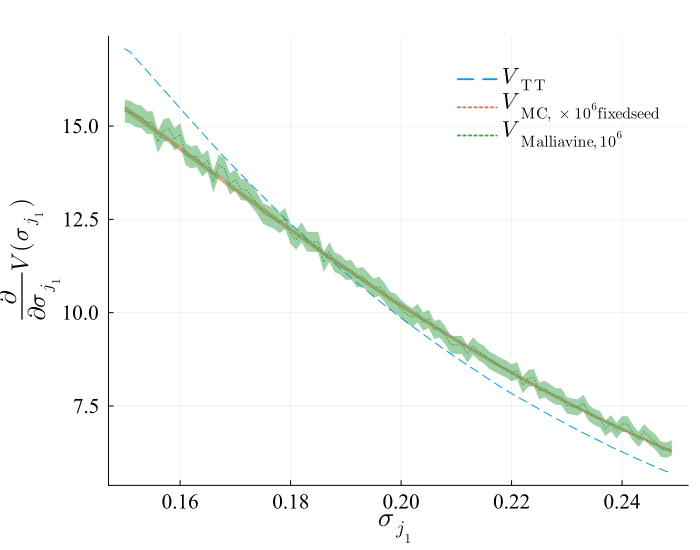

In [36]:
p_nume_3 = plot(
        #yaxis=:log,
        title = " ",
        titlefont = "Times New Roman", 
        xlabel=L"\sigma_{j_1}^{}", 
        ylabel= L"\frac{\partial}{\partial \sigma_{j_1}} V(\sigma_{j_1}^{} ) ",
        legend = :topright,
        guidefont = font(10,"Computer Modern"),
        #ylims = (10^1, 3*10^6),
        #ylims = (0, 1.11*10^6),
        #xticks = (vcat(1, [2*i+1 for i in 1:8], 2*d-1)),
        #yticks = ([10^i for i in 1:1:9]),
        titlefontsize = 16,
        legendfontsize = 15,
        tickfontsize = 13,
        xlabelfontsize = 18,
        ylabelfontsize = 16,
        xguidefont = 15,
        yguidefont = 15,
        foreground_color_legend = nothing,
        background_color_legend = nothing,
        fontfamily = "Times New Roman",
        #left_margin=Plots.Measures.Length(:mm, 15.0),
        #left_margin=Plots.Measures.Length(:mm, 10),
        #top_margin=Plots.Measures.Length(:mm, 3.0),
        #bottom_margin=Plots.Measures.Length(:mm, 4.0),
        #right_margin=Plots.Measures.Length(:mm, 3.0),
        size = (700, 550)
        )


plot!(
    p_nume_3,
    σs,
    res_grad_sigma,
    linestyle = :dash,
    label = L"V_{\mathrm{TT}}",
    #markersize = 3.5,
)

plot!(
    p_nume_3,
    σs,
    means_vega_10_6 ,
    ribbon=errors_vega_10_6,
    fillalpha=0.5,
    linestyle = :dot,
    label = L"V_{\mathrm{MC},  \times 10^6 \mathrm{fixed seed}}",
    )

    plot!(
        p_nume_3,
        σs,
        means_vega_rand_malliavine_10_6,
        ribbon=error_vega_rand_malliavine_10_6,
        fillalpha=0.5,
        linewidth = 1,
        linestyle = :dot,
        label = L"V_{\mathrm{Malliavine}, 10^6}",
        )
p_nume_3

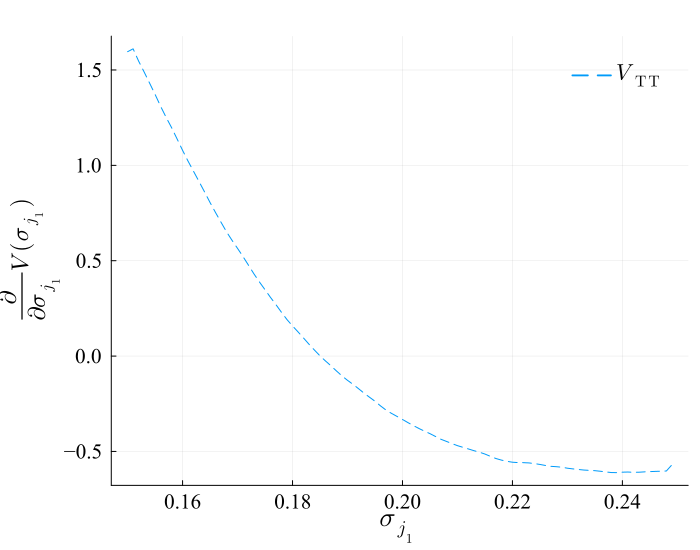

In [37]:
p_nume_3_ = plot(
        #yaxis=:log,
        title = " ",
        titlefont = "Times New Roman", 
        xlabel=L"\sigma_{j_1}^{}", 
        ylabel= L"\frac{\partial}{\partial \sigma_{j_1}} V(\sigma_{j_1}^{} ) ",
        legend = :topright,
        guidefont = font(10,"Computer Modern"),
        #ylims = (10^1, 3*10^6),
        #ylims = (0, 1.11*10^6),
        #xticks = (vcat(1, [2*i+1 for i in 1:8], 2*d-1)),
        #yticks = ([10^i for i in 1:1:9]),
        titlefontsize = 16,
        legendfontsize = 15,
        tickfontsize = 13,
        xlabelfontsize = 18,
        ylabelfontsize = 16,
        xguidefont = 15,
        yguidefont = 15,
        foreground_color_legend = nothing,
        background_color_legend = nothing,
        fontfamily = "Times New Roman",
        #left_margin=Plots.Measures.Length(:mm, 15.0),
        #left_margin=Plots.Measures.Length(:mm, 10),
        #top_margin=Plots.Measures.Length(:mm, 3.0),
        #bottom_margin=Plots.Measures.Length(:mm, 4.0),
        #right_margin=Plots.Measures.Length(:mm, 3.0),
        size = (700, 550)
        )


plot!(
    p_nume_3_,
    σs,
    res_grad_sigma .- means_vega_10_6,
    linestyle = :dash,
    label = L"V_{\mathrm{TT}}",
    #markersize = 3.5,
)
p_nume_3_

### デルタ

In [38]:
S0_list_2 = [[i, 111.9, 115.5, 108.6, 113.4] for i in Ss]
σs_2 = [0.181, 0.153, 0.172, 0.229, 0.197]
σs_2_indices = [findfirst(isequal(val), σs) for val in σs_2]
σs[σs_2_indices]


5-element Vector{Float64}:
 0.181
 0.153
 0.172
 0.229
 0.197

In [39]:
σs_2_indices = [findfirst(isequal(val), σs) for val in σs_2]
# 各iと他の値に対応するインデックスをSs内で計算
S0_list_2_indices = [[findfirst(isequal(sublist[1]), Ss),
                      findfirst(isequal(sublist[2]), Ss),
                      findfirst(isequal(sublist[3]), Ss),
                      findfirst(isequal(sublist[4]), Ss),
                      findfirst(isequal(sublist[5]), Ss)] 
                     for sublist in S0_list_2];

In [40]:
combinations_S0 = [[(σs_2_indices[i], S0_list_2_indices[j][i]) for i in 1:length(σs_2)] for j in 1:length(Ss)];

In [41]:
function evaluate_options3(combinations, tt_option)
    result_hako = []
    result_time = []
    for i in 1:length(combinations)
        #indices = ttog.indices_1d_to_2d(i, 100)
        #indices_pairs = [(indices[i], indices[i+1]) for i in 1:2:length(indices)-1]
        #@show i
        indices_pairs = combinations[i]
        time_inner = @elapsed begin
            inner_ = _evaluate3(tt_option, indices_pairs)
            #result = ((η^d) * exp(-r * (T - t)) * inner_) / ((2 * π)^d)
            #result = real(result)
            result = inner_ 
        end
        push!(result_hako, result)
        push!(result_time, time_inner)
    end
    return result_hako, result_time
end


evaluate_options3 (generic function with 1 method)

In [42]:
res_S0, time_S0 = evaluate_options3(combinations_S0, option_tt)
vol_stock0_stock0_rand_10_6 = npzread("vol_stock0_stock0_rand_10_6.npy")
means_stock0_10_6 = vol_stock0_stock0_rand_10_6[:, 1]
errors_stock0_10_6 = vol_stock0_stock0_rand_10_6[:, 2]


100-element Vector{Float64}:
 0.010539672389898086
 0.010665170092995939
 0.010789755448916903
 0.010913352582946467
 0.01103597537460558
 0.011157665462457078
 0.011278184118740684
 0.011397592413348562
 0.011515860736636024
 0.01163297150787654
 ⋮
 0.01650081282439542
 0.016514235246452187
 0.01652711174068506
 0.016539486721561053
 0.016551304670996393
 0.01656259704923856
 0.016573336097245647
 0.016583523665620457
 0.016593200467624435

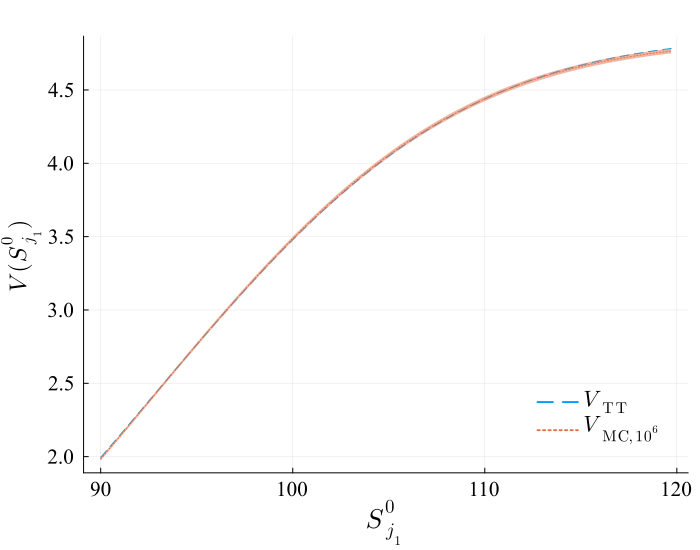

In [43]:
p_nume_6 = plot(
        #yaxis=:log,
        title = " ",
        titlefont = "Times New Roman", 
        xlabel=L"S^{0}_{j_1}", 
        ylabel= L" V(S^{0}_{j_1}) ",
        legend = :bottomright,
        guidefont = font(10,"Computer Modern"),
        #ylims = (10^1, 3*10^6),
        #ylims = (0, 1.11*10^6),
        #xticks = (vcat(1, [2*i+1 for i in 1:8], 2*d-1)),
        #yticks = ([10^i for i in 1:1:9]),
        titlefontsize = 16,
        legendfontsize = 15,
        tickfontsize = 13,
        xlabelfontsize = 18,
        ylabelfontsize = 16,
        xguidefont = 15,
        yguidefont = 15,
        foreground_color_legend = nothing,
        background_color_legend = nothing,
        fontfamily = "Times New Roman",
        #left_margin=Plots.Measures.Length(:mm, 15.0),
        #left_margin=Plots.Measures.Length(:mm, 10),
        #top_margin=Plots.Measures.Length(:mm, 3.0),
        #bottom_margin=Plots.Measures.Length(:mm, 4.0),
        #right_margin=Plots.Measures.Length(:mm, 3.0),
        size = (700, 550)
        )

        plot!(
            p_nume_6,
            Ss,
            res_S0, 
            #markershape = :circle,
            label = L"V_{\mathrm{TT}}",
            #markersize = 3.5,
            linewidth = 1,
            linestyle = :dash,
        )
        
        plot!(
            p_nume_6,
            Ss,
            means_stock0_10_6,
            ribbon=errors_stock0_10_6,
            fillalpha=0.5,
            linewidth = 1,
            linestyle = :dot,
            label = L"V_{\mathrm{MC}, 10^6}",
            )

p_nume_6

In [44]:
#vol_stock0_delta_rand_10_6= npzread("../MC_data/vol_stock0_delta_rand_10_6.npy")

In [45]:
diff_mat_S0 = TCIMC.diff_matrix(100, 0.3)
option_tt_grad_sigma = TCIMC.grad_tt_stock0(option_tt, 1, diff_mat_S0) # 
res_S0_grad, time_S0_grad = evaluate_options3(combinations_S0, option_tt_grad_sigma);

In [46]:
vol_stock0_delta_rand_10_6 = npzread("vol_stock0_delta_rand_10_6.npy")
means_delta_10_6 = vol_stock0_delta_rand_10_6[:, 1]
errors_delta_10_6 = vol_stock0_delta_rand_10_6[:, 2]


100-element Vector{Float64}:
 0.000779762040999616
 0.0007798833904223368
 0.000779925366334644
 0.0007797701373868349
 0.0007795191011902693
 0.000778919920343293
 0.0007780870527009341
 0.0007770177512746724
 0.0007760198233571674
 0.0007749105701154031
 ⋮
 0.0002816241788037038
 0.00027471971954252857
 0.0002680594531030076
 0.0002616205602033071
 0.0002552547998488721
 0.00024911872628899113
 0.00024295691778402162
 0.00023667698877266274
 0.00023053910798349184

In [47]:
JLD2.@load "vol&stock0_vol_stock0_delta_rand_malliavine.jld2" vol_stock0_delta_rand
delta_malliavine_10_6 = vol_stock0_delta_rand
mean_delta_malliavine_10_6 = [vol_stock0_delta_rand[i][1] for i in 1:100]
error_delta_malliavine_10_6 = [vol_stock0_delta_rand[i][2] for i in 1:100]


100-element Vector{Float64}:
 0.0016009438965690354
 0.001606844557800098
 0.0016214842403103472
 0.0016350351494102153
 0.00162071002071346
 0.0016468485044789719
 0.001652478047010926
 0.0016527237901091407
 0.0016545442443112175
 0.0016653626252189366
 ⋮
 0.0018186985606656032
 0.001813241680240111
 0.0018170777111282314
 0.0018171505241266952
 0.0018123615133916382
 0.001822865885575572
 0.0018161670749753968
 0.001813322666558984
 0.0018070054692764044

In [48]:
means_delta_10_6 

100-element Vector{Float64}:
 0.15318841382373882
 0.15385770336485052
 0.15450735926530912
 0.15510711350802756
 0.15553964371808252
 0.15583299268465978
 0.15606189610063992
 0.15621393694845273
 0.1563490611465857
 0.15641103558774555
 ⋮
 0.022543238317378464
 0.021492429764383335
 0.020482056429990642
 0.019532586415316435
 0.018621547684725903
 0.017754200566330786
 0.0169245086684212
 0.01609448944071676
 0.015271098257168304

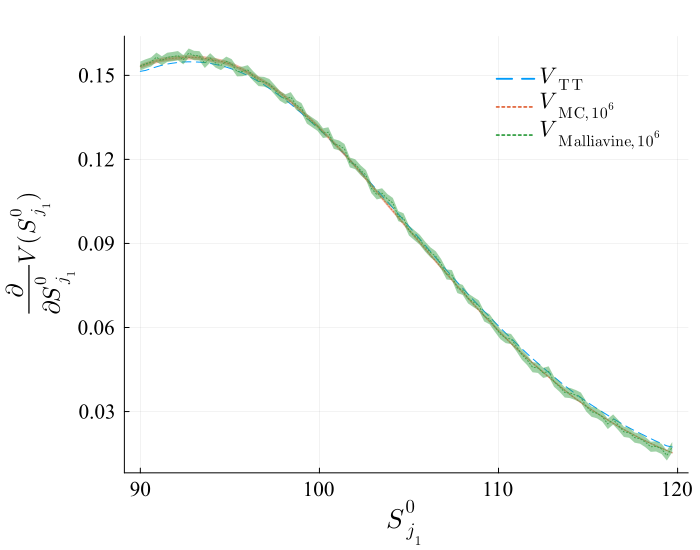

In [49]:
p_nume_7 = plot(
        #yaxis=:log,
        title = " ",
        titlefont = "Times New Roman", 
        xlabel=L"S^{0}_{j_1}", 
        ylabel= L"\frac{\partial}{\partial S^{0}_{j_1}} V(S^{0}_{j_1}) ",
        legend = :topright,
        guidefont = font(10,"Computer Modern"),
        #ylims = (10^1, 3*10^6),
        #ylims = (0, 1.11*10^6),
        #xticks = (vcat(1, [2*i+1 for i in 1:8], 2*d-1)),
        #yticks = ([10^i for i in 1:1:9]),
        titlefontsize = 16,
        legendfontsize = 15,
        tickfontsize = 13,
        xlabelfontsize = 18,
        ylabelfontsize = 16,
        xguidefont = 15,
        yguidefont = 15,
        foreground_color_legend = nothing,
        background_color_legend = nothing,
        fontfamily = "Times New Roman",
        #left_margin=Plots.Measures.Length(:mm, 15.0),
        left_margin=Plots.Measures.Length(:mm, 3),
        #top_margin=Plots.Measures.Length(:mm, 3.0),
        #bottom_margin=Plots.Measures.Length(:mm, 4.0),
        #right_margin=Plots.Measures.Length(:mm, 3.0),
        size = (700, 550)
        )

        plot!(
            p_nume_7,
            Ss,
            res_S0_grad,
            #markershape = :circle,
            label = L"V_{\mathrm{TT}}",
            linestyle = :dash,
            #markersize = 3.5,
        )

plot!(
    p_nume_7,
    Ss,
    means_delta_10_6,
    ribbon=errors_delta_10_6,
    fillalpha=0.5,
    linestyle = :dot,
    label = L"V_{\mathrm{MC},10^6}",
    )

    plot!(
    p_nume_7,
    Ss,
    mean_delta_malliavine_10_6,
    ribbon=error_delta_malliavine_10_6,
    fillalpha=0.5,
    linestyle = :dot,
    label = L"V_{\mathrm{Malliavine},10^6}",
    )


    
#plot!(p_nume_7, Ss, data_delta_10_6[1])  

#plot!(p_nume_7, Ss, diff_mat_S0  * means_stock0_10_6)
p_nume_7

In [50]:
diff_mat_S0_second = TCIMC.second_diff_matrix(100, 0.3) 
option_tt_grad_S0_grad = TCIMC.grad_tt_stock0(option_tt, 1, diff_mat_S0_second) # 
res_S0_grad_grad, time_S0_grad_grad = evaluate_options3(combinations_S0, option_tt_grad_S0_grad);

In [51]:
vol_stock0_gamma_rand_10_6 = npzread("vol_stock0_gamma_rand_10_6.npy")
means_gamma_10_6 = vol_stock0_gamma_rand_10_6[:, 1]
errors_gamma_10_6 = vol_stock0_gamma_rand_10_6[:, 2]

100-element Vector{Float64}:
 0.0005044957189342526
 0.0005051937431751925
 0.0005109092720696693
 0.0005063839699277016
 0.0005075648280035718
 0.0005030835355092722
 0.0005054675745572017
 0.0005117418698324541
 0.0005060196325028531
 0.0005057272950929151
 ⋮
 0.00020668565726052911
 0.00020137610435374065
 0.00019353332200668102
 0.00019048886354487636
 0.00018588702162802183
 0.00018758487740131892
 0.00018569601917882848
 0.0001803417337326558
 0.00016831556256744764

In [52]:
JLD2.@load "vol&stock0_vol_stock0_gamma_rand_malliavine.jld2" vol_stock0_gamma_rand
gamma_malliavine_10_6 = vol_stock0_gamma_rand
mean_gamma_malliavine_10_6 = [vol_stock0_gamma_rand[i][1] for i in 1:100]
error_gamma_malliavine_10_6 = [vol_stock0_gamma_rand[i][2] for i in 1:100]


100-element Vector{Float64}:
 0.00029584833615139863
 0.000299853337611188
 0.00030091718058707453
 0.0002995012846431739
 0.0002959853550492245
 0.0003047529399784024
 0.0002995644880993044
 0.00029363774802083973
 0.0002936223202740258
 0.0003034704275837748
 ⋮
 0.00024532738838580463
 0.00024601422970070986
 0.00024431876863629067
 0.00024509689118623715
 0.00024225273449159023
 0.0002429082647377086
 0.00024205488038322423
 0.0002397760174273742
 0.00024243939522854713

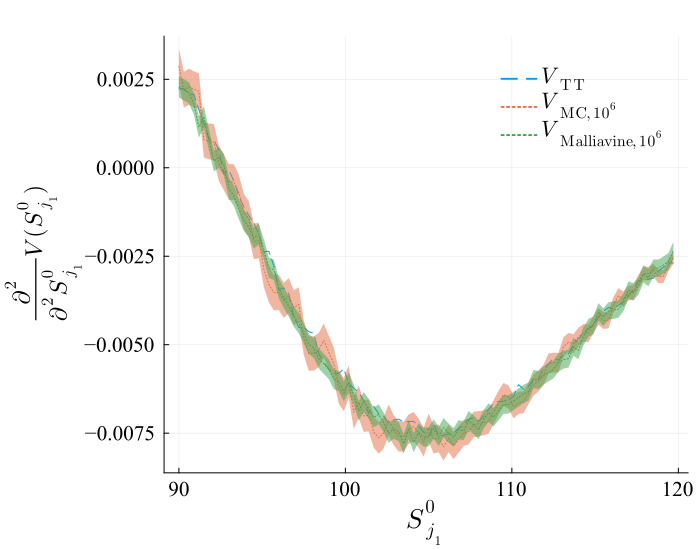

In [53]:
p_nume_8 = plot(
        #yaxis=:log,
        title = " ",
        titlefont = "Times New Roman", 
        xlabel=L"S^{0}_{j_1}", 
        ylabel= L"\frac{\partial^{2}}{\partial^{2} S^{0}_{j_1}} V(S^{0}_{j_1}) ",
        legend = :topright,
        guidefont = font(10,"Computer Modern"),
        #ylims = (10^1, 3*10^6),
        #ylims = (0, 1.11*10^6),
        #xticks = (vcat(1, [2*i+1 for i in 1:8], 2*d-1)),
        #yticks = ([10^i for i in 1:1:9]),
        titlefontsize = 16,
        legendfontsize = 15,
        tickfontsize = 13,
        xlabelfontsize = 18,
        ylabelfontsize = 16,
        xguidefont = 15,
        yguidefont = 15,
        foreground_color_legend = nothing,
        background_color_legend = nothing,
        fontfamily = "Times New Roman",
        #left_margin=Plots.Measures.Length(:mm, 15.0),
        left_margin=Plots.Measures.Length(:mm, 3),
        #top_margin=Plots.Measures.Length(:mm, 3.0),
        #bottom_margin=Plots.Measures.Length(:mm, 4.0),
        #right_margin=Plots.Measures.Length(:mm, 3.0),
        size = (700, 550)
        )

        plot!(
            p_nume_8,
            Ss,
            res_S0_grad_grad,
            linestyle = :dash,
            label = L"V_{\mathrm{TT}}",
            #markersize = 3.5,
        )

        plot!(
            p_nume_8,
            Ss,
            means_gamma_10_6,
            ribbon=errors_gamma_10_6,
            fillalpha=0.5,
            linestyle = :dot,
            label = L"V_{\mathrm{MC}, 10^6 }",
            )
        plot!(
        p_nume_8,
        Ss,
        mean_gamma_malliavine_10_6,
        ribbon=error_gamma_malliavine_10_6,
        fillalpha=0.5,
        linestyle = :dot,
        label = L"V_{\mathrm{Malliavine},10^6}",
        )
    
p_nume_8

# plot

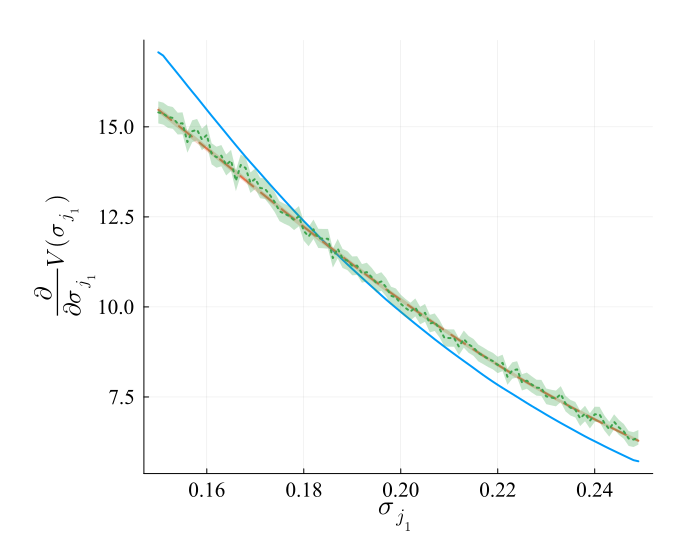

In [54]:
p_nume_4 = plot(
        #yaxis=:log,
        title = " ",
        titlefont = "Times New Roman", 
        xlabel=L"\sigma_{j_1}^{}", 
        ylabel= L"\frac{\partial}{\partial \sigma_{j_1}} V(\sigma_{j_1}^{} ) ",
        legend = false,
        guidefont = font(10,"Computer Modern"),
        #ylims = (10^1, 3*10^6),
        #ylims = (0, 1.11*10^6),
        #xticks = (vcat(1, [2*i+1 for i in 1:8], 2*d-1)),
        #yticks = ([10^i for i in 1:1:9]),
        legendframe=:box,
        titlefontsize = 16,
        legendfontsize = 15,
        tickfontsize = 13,
        xlabelfontsize = 18,
        ylabelfontsize = 16,
        xguidefont = 15,
        yguidefont = 15,
        foreground_color_legend = nothing,
        background_color_legend = nothing,
        fontfamily = "Times New Roman",
        #left_margin=Plots.Measures.Length(:mm, 15.0),
        left_margin=Plots.Measures.Length(:mm, 10),
        top_margin=Plots.Measures.Length(:mm, 2.0),
        bottom_margin=Plots.Measures.Length(:mm, 4.0),
        right_margin=Plots.Measures.Length(:mm, 10.0),
        size = (700, 550)
        )


plot!(
    p_nume_4,
    σs,
    res_grad_sigma,
    linestyle = :solid,
    label = L"V_{\mathrm{TT}}",
    linewidth=2,
    #markersize = 3.5,
)

plot!(
    p_nume_4,
    σs,
    means_vega_10_6 ,
    ribbon=errors_vega_10_6,
    fillalpha=0.3,
    linestyle = :dash,
    label = L"V_{\mathrm{MC},  \times 10^6 \mathrm{fixed seed}}",
    linewidth=2,
    )
    plot!(
        p_nume_4,
        σs,
        means_vega_rand_malliavine_10_6,
        ribbon=error_vega_rand_malliavine_10_6,
        fillalpha=0.3,
        #linestyle = :lightgreed,
        label = L"V_{\mathrm{Malliavine},10^6}",
        #color=:gray,
        #marker=:circle,
        linewidth=2,
        linestyle = :dot,
        )
    
p_nume_4

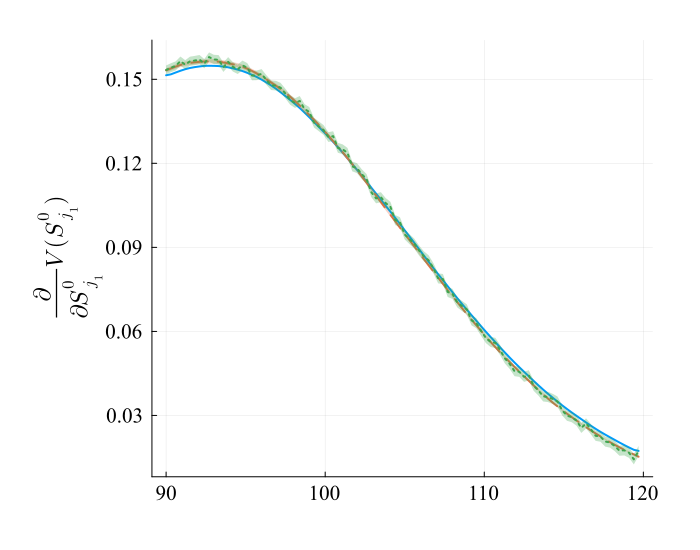

In [55]:
p_nume_7 = plot(
        #yaxis=:log,
        title = " ",
        titlefont = "Times New Roman", 
        #xlabel=L"S^{0}_{j_1}", 
        ylabel= L"\frac{\partial}{\partial S^{0}_{j_1}} V(S^{0}_{j_1}) ",
        #legend = false,
        guidefont = font(10,"Computer Modern"),
        #ylims = (10^1, 3*10^6),
        #ylims = (0, 1.11*10^6),
        #xticks = (vcat(1, [2*i+1 for i in 1:8], 2*d-1)),
        #yticks = ([10^i for i in 1:1:9]),
        titlefontsize = 16,
        legendframe=:box,
        legendfontsize = 15,
        tickfontsize = 13,
        xlabelfontsize = 18,
        ylabelfontsize = 16,
        xguidefont = 15,
        yguidefont = 15,
        foreground_color_legend = nothing,
        background_color_legend = nothing,
        fontfamily = "Times New Roman",
        #left_margin=Plots.Measures.Length(:mm, 15.0),
        left_margin=Plots.Measures.Length(:mm, 10.0),
        top_margin=Plots.Measures.Length(:mm, 2.0),
        bottom_margin=Plots.Measures.Length(:mm, 10.0),
        right_margin=Plots.Measures.Length(:mm, 10.0),
        size = (700, 550)
        )

        plot!(
            p_nume_7,
            Ss,
            res_S0_grad,
            #markershape = :circle,
            label = L"V_{\mathrm{TT}}",
            #markersize = 3.5,
            linewidth=2,
            linestyle = :solid
        )

plot!(
    p_nume_7,
    Ss,
    means_delta_10_6,
    ribbon=errors_delta_10_6,
    fillalpha=0.3,
    linestyle = :dash,
    label = L"V_{\mathrm{MC},10^6}",
    linewidth=2,
    )

plot!(
    p_nume_7,
    Ss,
    mean_delta_malliavine_10_6,
    ribbon=error_delta_malliavine_10_6,
    fillalpha=0.3,
    #linestyle = :lightgreed,
    label = L"V_{\mathrm{Malliavine},10^6}",
    #color=:gray,
    #marker=:circle,
    linewidth=2,
    linestyle = :dot,
    )

    
#plot!(p_nume_7, Ss, data_delta_10_6[1]) 
#annotate!(p_one, -1.0, -1.0, text("(a) ", :left, 17, "Times New Roman"))
plot!(legend=(1.2, 0.41),legendframe=:box)

p_nume_7

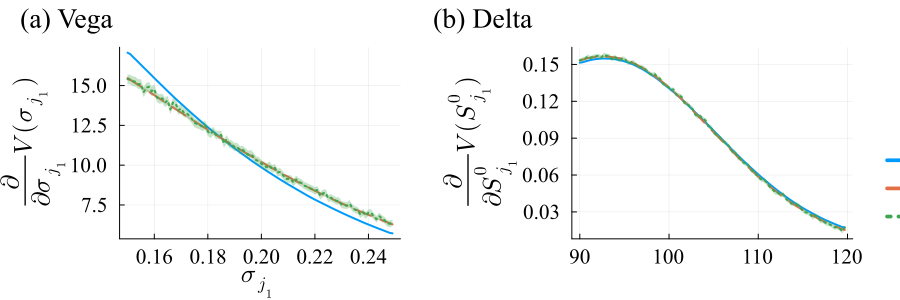

In [56]:
p_one = plot(
    p_nume_4,
    p_nume_7,  # カンマをここに追加
    layout = grid(1, 2, widths=[0.50, 0.50]),  # heights パラメータを削除
    size = (900, 300),
    link = :x,  # x軸のスケールを連動
    title = "",  # 全体のタイトルは個別プロットのタイトルと重複するため削除
    margin = 5Plots.mm,
    titlefont = "Times New Roman",
    fontfamily = "Times New Roman",
    guidefont = font(17, "Computer Modern"),
    top_margin=Plots.Measures.Length(:mm, 10.0)
)


# y軸のスケールを個別に設定
#plot!(p_one[1], title="(a)")
#plot!(p_one[1], title="(a)", titlelocation=:left)
#plot!(p_one[2], title="(b)")
annotate!(p_one[1], (-0.35, 1.15), text("(a) Vega", :left, 17, "Times New Roman"))
annotate!(p_one[2], (-0.49, 1.15), text("(b) Delta", :left, 17, "Times New Roman"))
# プロットを表示
#annotate!(p_one, 10.5, 1.4, text("(a) ", :left, 17, "Times New Roman"))
display(p_one)

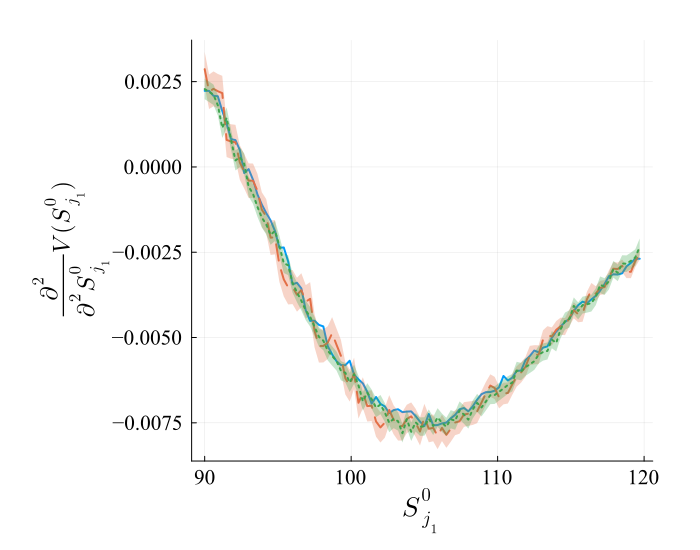

In [57]:
p_nume_8 = plot(
        #yaxis=:log,
        title = " ",
        titlefont = "Times New Roman", 
        xlabel=L"S^{0}_{j_1}", 
        ylabel= L"\frac{\partial^{2}}{\partial^{2} S^{0}_{j_1}} V(S^{0}_{j_1}) ",
        legend = false,
        guidefont = font(10,"Computer Modern"),
        #ylims = (10^1, 3*10^6),
        #ylims = (0, 1.11*10^6),
        #xticks = (vcat(1, [2*i+1 for i in 1:8], 2*d-1)),
        #yticks = ([10^i for i in 1:1:9]),
        titlefontsize = 16,
        legendfontsize = 15,
        tickfontsize = 13,
        xlabelfontsize = 18,
        ylabelfontsize = 16,
        xguidefont = 15,
        yguidefont = 15,
        foreground_color_legend = nothing,
        background_color_legend = nothing,
        fontfamily = "Times New Roman",
        #left_margin=Plots.Measures.Length(:mm, 15.0),
        left_margin=Plots.Measures.Length(:mm, 10),
        top_margin=Plots.Measures.Length(:mm, 2.0),
        bottom_margin=Plots.Measures.Length(:mm, 4.0),
        right_margin=Plots.Measures.Length(:mm, 10.0),
        size = (700, 550)
        )

        plot!(
            p_nume_8,
            Ss,
            res_S0_grad_grad,
            linestyle = :solid,
            label = L"V_{\mathrm{TT}}",
            linewidth=2,
            #markersize = 3.5,
        )

        plot!(
            p_nume_8,
            Ss,
            means_gamma_10_6,
            ribbon=errors_gamma_10_6,
            fillalpha=0.3,
            linestyle = :dash,
            label = L"V_{\mathrm{MC}, 10^6 }",
            linewidth=2,
            )
        plot!(
            p_nume_8,
            Ss,
            mean_gamma_malliavine_10_6,
            ribbon=error_gamma_malliavine_10_6,
            fillalpha=0.3,
            #linestyle = :lightgreed,
            label = L"V_{\mathrm{Malliavine},10^6}",
            #color=:gray,
            #marker=:circle,
            linewidth=2,
            linestyle = :dot,
            )
            
p_nume_8

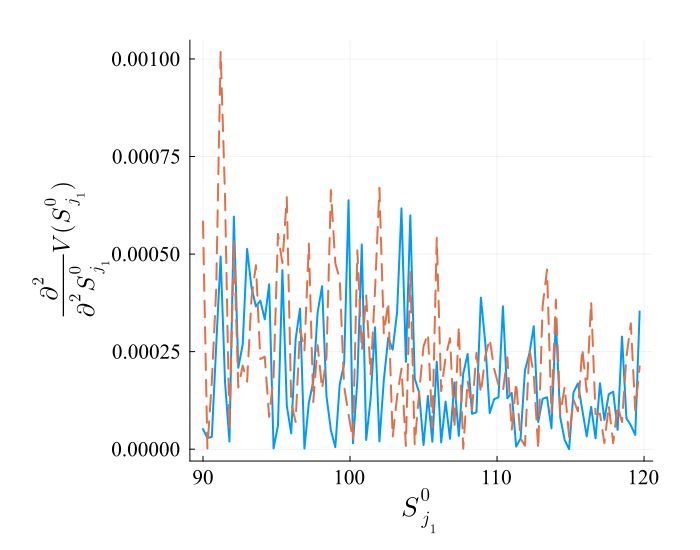

In [58]:
p_nume_test = plot(
        #yaxis=:log,
        title = " ",
        titlefont = "Times New Roman", 
        xlabel=L"S^{0}_{j_1}", 
        ylabel= L"\frac{\partial^{2}}{\partial^{2} S^{0}_{j_1}} V(S^{0}_{j_1}) ",
        legend = false,
        guidefont = font(10,"Computer Modern"),
        #ylims = (10^1, 3*10^6),
        #ylims = (0, 1.11*10^6),
        #xticks = (vcat(1, [2*i+1 for i in 1:8], 2*d-1)),
        #yticks = ([10^i for i in 1:1:9]),
        titlefontsize = 16,
        legendfontsize = 15,
        tickfontsize = 13,
        xlabelfontsize = 18,
        ylabelfontsize = 16,
        xguidefont = 15,
        yguidefont = 15,
        foreground_color_legend = nothing,
        background_color_legend = nothing,
        fontfamily = "Times New Roman",
        #left_margin=Plots.Measures.Length(:mm, 15.0),
        left_margin=Plots.Measures.Length(:mm, 10),
        top_margin=Plots.Measures.Length(:mm, 2.0),
        bottom_margin=Plots.Measures.Length(:mm, 4.0),
        right_margin=Plots.Measures.Length(:mm, 10.0),
        size = (700, 550)
        )

        plot!(
            p_nume_test,
            Ss,
            abs.(res_S0_grad_grad .- mean_gamma_malliavine_10_6),
            linestyle = :solid,
            label = L"V_{\mathrm{TT}}",
            linewidth=2,
            #markersize = 3.5,
        )

        plot!(
            p_nume_test,
            Ss,
            abs.(means_gamma_10_6 .- mean_gamma_malliavine_10_6),
            fillalpha=0.3,
            linestyle = :dash,
            label = L"V_{\mathrm{MC}, 10^6 }",
            linewidth=2,
        )
            
p_nume_test

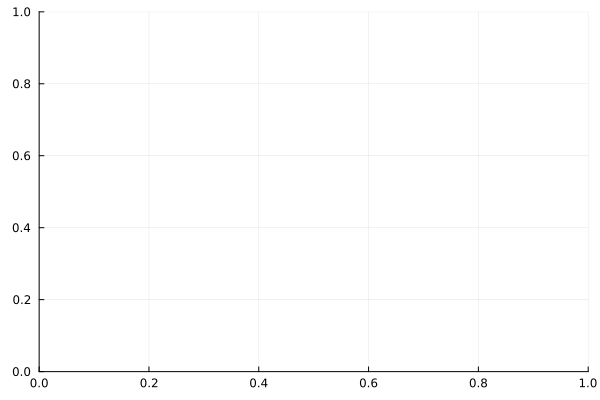

In [59]:
p_nume_9 = plot(
        #yaxis=:log,
        #title = " ",
        #titlefont = "Times New Roman", 
        #xlabel=L"S^{0}_{j_1}", 
        #ylabel= L"\frac{\partial^{2}}{\partial^{2} S^{0}_{j_1}} V(S^{0}_{j_1}) ",
        #legend = false,
        #guidefont = font(10,"Computer Modern"),
        #ylims = (10^1, 3*10^6),
        #ylims = (0, 1.11*10^6),
        #xticks = (vcat(1, [2*i+1 for i in 1:8], 2*d-1)),
        #yticks = ([10^i for i in 1:1:9]),
        #titlefontsize = 16,
        #legendfontsize = 15,
        #tickfontsize = 13,
        #xlabelfontsize = 18,
        #ylabelfontsize = 16,
        #xguidefont = 15,
        #yguidefont = 15,
        #foreground_color_legend = nothing,
        #background_color_legend = nothing,
        #fontfamily = "Times New Roman",
        #left_margin=Plots.Measures.Length(:mm, 15.0),
        #left_margin=Plots.Measures.Length(:mm, 10),
        #top_margin=Plots.Measures.Length(:mm, 2.0),
       # bottom_margin=Plots.Measures.Length(:mm, 4.0),
        #right_margin=Plots.Measures.Length(:mm, 10.0),
        #size = (700, 550)
        )



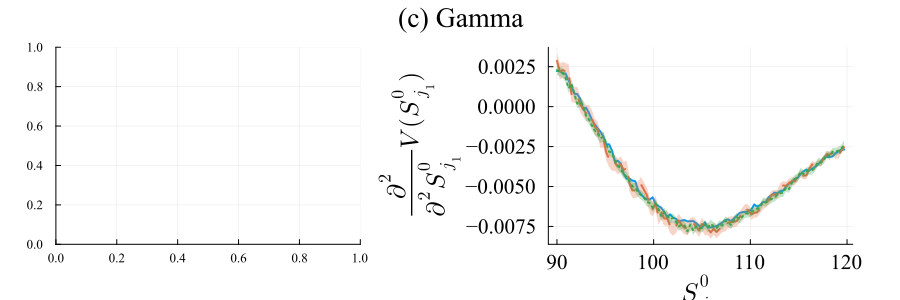

In [60]:
p_two = plot(
    p_nume_9,
    p_nume_8,  # カンマをここに追加
    layout = grid(1, 2, widths=[0.50, 0.50]),  # heights パラメータを削除
    size = (900, 300),
    link = :x,  # x軸のスケールを連動
    title = "",  # 全体のタイトルは個別プロットのタイトルと重複するため削除
    margin = 5Plots.mm,
    titlefont = "Times New Roman",
    fontfamily = "Times New Roman",
    guidefont = font(17, "Computer Modern"),
    top_margin=Plots.Measures.Length(:mm, 10.0)
)

#annotate!(p_two, 1.10, 1.0, text("(c) ", :left, 17, "Times New Roman"))
annotate!(p_two[2], (-0.49, 1.15), text("(c) Gamma", :left, 17, "Times New Roman"))
# プロットを表示
display(p_two)


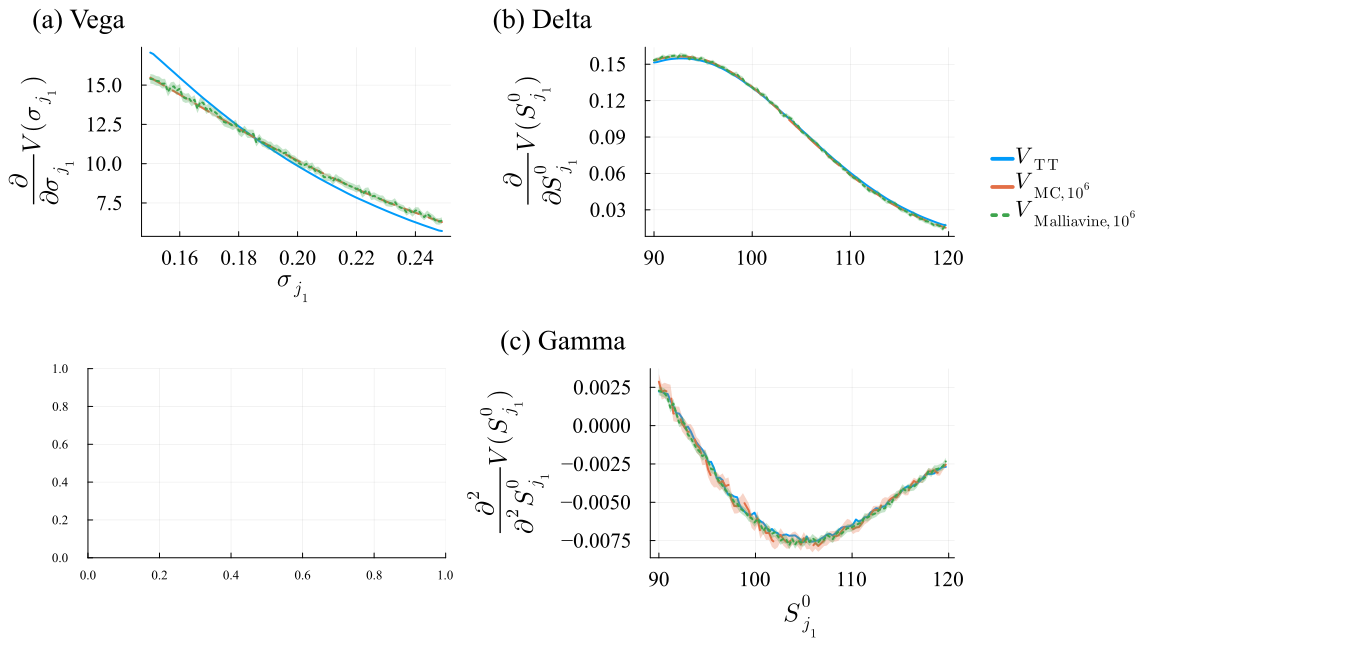

In [61]:
p_ = plot(
    #p_zero,
    p_one,
    p_two,
    layout = grid(2, 1, widths=[0.7, 0.3]),  # heights パラメータを削除
    #layout = grid(3, 1),  # レイアウトを中央寄せに簡略化
    size = (1350, 650),
    link = :x,  # x軸のスケールを連動
    #title = "aaa",  # 全体のタイトルは個別プロットのタイトルと重複するため削除
    margin = 3Plots.mm,
    titlefont = "Times New Roman",
    fontfamily = "Times New Roman",
    guidefont = font(17, "Computer Modern"),
    left_margin = Plots.Measures.Length(:mm, 12.0),  # 右の余白を減らす
    #top_margin=Plots.Measures.Length(:mm, 2.0),
    bottom_margin=Plots.Measures.Length(:mm, 10.0),
    #right_margin=Plots.Measures.Length(:mm, -0.1),
    #legendframe=:box
)
#を表示
#plot!(p_article[1], title = "(a) \sigma のタイトル", titlefont = "Times New Roman", titlefontsize = 16)

#annotate!(p_[1], 4, 130, text("(a) ", :left, 17, "Times New Roman"))
#annotate!(p_article[2], -4.05, -2.5, text("(b) " * L"\vec{S}_{0}", :left, 17, "Times New Roman"))
#annotate!(p_article[3], -2.75, -49.1, text("(c) " * L"\vec{\sigma} & \vec{S}_{0}", :left, 17, "Times New Roman"))

# 左上と右上に個別のタイトルをつける (例)
#annotate!(p_article[1], 4, 130, text( L"\hat{\phi}", :left, 17, "Times New Roman"))  # 左上
#annotate!(p_article[1], 16, 130, text(L"\tilde{V}", :right, 17, "Times New Roman"))  # 右上

display(p_)

In [62]:
# プロットを保存（オプション）
savefig(p_, "greeks_rand.pdf")

"/Users/sakurairihito/Documents/Research/post-doc/qtt_option/notebook/fixed-seed-MC/allparam/greeks_rand.pdf"